In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [69]:
df = pd.read_csv('bankmarketing.csv')

# Using only the following columns for making clusters : "df=df[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']]"
df=df[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']]

In [70]:
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   job          41188 non-null  object 
 1   marital      41188 non-null  object 
 2   education    41188 non-null  object 
 3   default      41188 non-null  object 
 4   housing      41188 non-null  object 
 5   loan         41188 non-null  object 
 6   contact      41188 non-null  object 
 7   month        41188 non-null  object 
 8   day_of_week  41188 non-null  object 
 9   poutcome     41188 non-null  object 
 10  age          41188 non-null  int64  
 11  duration     41188 non-null  int64  
 12  euribor3m    41188 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 4.1+ MB


In [72]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [6]:
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857


In [39]:
df_cat=df[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [40]:
df_num=df[['age','duration','euribor3m']]

In [41]:
scalar=StandardScaler()
df_num = scalar.fit_transform(df_num)

In [42]:
df_num = pd.DataFrame(df_num)
df_num.columns=['age','duration','euribor3m']

In [43]:
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)

In [62]:
grouped_df=pd.concat([df_cat,df_num],axis=1)

In [63]:
grouped_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.71246
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.71246
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.71246
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.71246
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.71246


In [64]:
grouped_df_proto = grouped_df.to_numpy()

In [75]:
kproto = KPrototypes(n_jobs=-1,n_clusters=5,verbose=1,n_init=2)

In [76]:
output= kproto.fit_predict(grouped_df_proto,categorical=[0,1,2,3,4,5,6,7,8,9])

Best run was number 2


In [77]:
grouped_df['cluster_id']=output

In [78]:
output

array([3, 3, 2, ..., 4, 4, 4], dtype=uint16)

In [79]:
grouped_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,cluster_id
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.712460,3
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.712460,3
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.712460,2
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.712460,3
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.712460,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,3.164336,0.292025,-1.495186,4
41184,1,1,5,0,0,0,0,7,0,1,0.573445,0.481012,-1.495186,4
41185,5,1,6,0,2,0,0,7,0,1,1.533034,-0.267225,-1.495186,4
41186,9,1,5,0,0,0,0,7,0,1,0.381527,0.708569,-1.495186,4


In [80]:
grouped_df.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
age            0
duration       0
euribor3m      0
cluster_id     0
dtype: int64

Best run was number 2
Best run was number 2
Best run was number 2
Best run was number 2
Best run was number 2
Best run was number 1
Best run was number 1
Best run was number 2


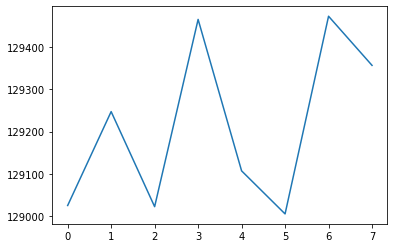

In [81]:
cost=[]
for i in range(1,9):
    kproto = KPrototypes(n_jobs=-1,n_clusters=5,verbose=1,n_init=2)
    output= kproto.fit_predict(grouped_df_proto,categorical=[0,1,2,3,4,5,6,7,8,9])
    cost.append(kproto.cost_)
plt.plot(cost)